In [12]:
from google.colab import files
x = files.upload()

Saving Maternal_Health_Risk_Data_Set.csv to Maternal_Health_Risk_Data_Set (1).csv


In [99]:
import pandas as pd
from pandas import Series, DataFrame
data = pd.read_csv('Maternal_Health_Risk_Data_Set.csv', delimiter = ',')
data.head()
# Binary classification is done in phrase 1

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,in-Risk
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


In [14]:
import numpy as np
dataset = np.genfromtxt('Maternal_Health_Risk_Data_Set.csv',delimiter=',', skip_header = True)
np.set_printoptions(formatter = {'float': '{:0.2f}'.format})
print(dataset.shape)

(1014, 7)


In [15]:
import random
np.random.shuffle(dataset)

In [161]:
# Split into training and validation, 20% validation set and 80% training 
index_20percent = int(0.2 * len(dataset[:, 0]))
print(index_20percent)

# X train
Xage_T = dataset[index_20percent:, 0]
XsBP_T = dataset[index_20percent:, 1]
XdBP_T = dataset[index_20percent:, 2]
Xbs_T = dataset[index_20percent:, 3]
Xbt_T = dataset[index_20percent:, 4]
Xhr_T = dataset[index_20percent:, 5]

# X valid
Xage_V = dataset[:index_20percent, 0]
XsBP_V = dataset[:index_20percent, 1]
XdBP_V = dataset[:index_20percent, 2]
Xbs_V = dataset[:index_20percent, 3]
Xbt_V = dataset[:index_20percent, 4]
Xhr_V = dataset[:index_20percent, 5]

XVALID = dataset[:index_20percent, :-1]
XTRAIN = dataset[index_20percent:, :-1]
YVALID = dataset[:index_20percent, -1]
YTRAIN = dataset[index_20percent:, -1]

# without age
X_T_no_age = np.delete(XTRAIN, [0] , 1)
X_V_no_age = np.delete(XVALID, [0] , 1)
# no age and bodyTemp
X_T_no_age_bt = np.delete(XTRAIN,[0,4], 1)
X_V_no_age_bt = np.delete(XVALID,[0,4], 1)
# no age, bodytemp, heartrate
X_T_no_age_bt_hr = np.delete(XTRAIN,[0,4,5], 1)
X_V_no_age_bt_hr = np.delete(XVALID,[0,4,5], 1)
# no age, bodytemp, heartrate, dBP
X_T_no_age_bt_hr_dBP = np.delete(XTRAIN,[0,2,4,5], 1)
X_V_no_age_bt_hr_dBP = np.delete(XVALID,[0,2,4,5], 1)
print(X_V_no_age_bt_hr_dBP)
print(XVALID)

202
[[0.08 -0.09]
 [0.08 -0.14]
 [-0.14 -0.13]
 [0.08 -0.13]
 [0.08 -0.09]
 [-0.41 -0.14]
 [-0.14 -0.13]
 [-0.25 -0.15]
 [0.08 -0.13]
 [0.08 -0.09]
 [0.19 0.72]
 [0.08 -0.06]
 [-0.25 -0.09]
 [-0.14 -0.09]
 [-0.25 -0.06]
 [0.08 -0.13]
 [0.08 -0.06]
 [0.19 -0.19]
 [0.02 -0.09]
 [-0.14 -0.06]
 [-0.14 -0.06]
 [-0.48 -0.06]
 [-0.25 -0.13]
 [-0.31 0.03]
 [0.08 0.03]
 [-0.25 0.03]
 [0.08 -0.13]
 [-0.14 -0.09]
 [0.08 -0.09]
 [-0.25 -0.13]
 [0.30 0.72]
 [0.30 0.80]
 [0.30 0.49]
 [0.08 0.03]
 [0.08 -0.09]
 [0.08 0.18]
 [0.08 -0.09]
 [0.30 -0.11]
 [-0.25 -0.13]
 [0.08 -0.09]
 [0.08 -0.13]
 [0.30 -0.09]
 [0.30 -0.05]
 [-0.14 -0.14]
 [0.08 0.18]
 [0.08 -0.06]
 [0.19 0.72]
 [-0.25 -0.09]
 [0.08 0.72]
 [0.08 -0.19]
 [0.08 0.49]
 [-0.14 -0.09]
 [0.08 -0.09]
 [0.08 -0.06]
 [-0.14 -0.09]
 [-0.25 0.18]
 [0.19 -0.13]
 [-0.25 -0.09]
 [-0.14 0.18]
 [-0.25 -0.07]
 [0.19 0.26]
 [0.08 0.18]
 [-0.14 -0.09]
 [0.08 -0.13]
 [0.08 -0.09]
 [-0.48 -0.20]
 [0.08 -0.05]
 [0.08 0.26]
 [0.08 -0.14]
 [0.08 0.11]
 [-0.25 -

In [17]:
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
range = XTRAIN.max(axis = 0) - XTRAIN.min(axis = 0)
XTRAIN /= range
# mean normalization just like in phrase 1

XVALID -= mean
XVALID /= range

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [162]:
model= Sequential() # multi-layer network
model.add(Dense(8, input_dim= len(XTRAIN[0,:])-4, activation = 'relu' ))
model.add(Dense(4, activation = 'relu' ))
model.add(Dense(2, activation = 'relu' ))
model.add(Dense(1, activation = 'sigmoid')) 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics='accuracy' )
# the best model found in phrase 3

In [163]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# File name must be in quotes
callback_a = ModelCheckpoint(filepath = 'Maternal_Health_Risk_Data_Set.csv', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

In [164]:
history = model.fit(X_T_no_age_bt_hr_dBP, YTRAIN, validation_data=(X_V_no_age_bt_hr_dBP, YVALID), batch_size=1,epochs=512, callbacks = [callback_a, callback_b])

Epoch 1/512
806/812 [============================>.] - ETA: 0s - loss: 0.6862 - accuracy: 0.5918
Epoch 1: val_loss improved from inf to 0.67629, saving model to Maternal_Health_Risk_Data_Set.csv
812/812 [==============================] - 2s 2ms/step - loss: 0.6862 - accuracy: 0.5911 - val_loss: 0.6763 - val_accuracy: 0.6040
Epoch 2/512
785/812 [============================>.] - ETA: 0s - loss: 0.6725 - accuracy: 0.6127
Epoch 2: val_loss improved from 0.67629 to 0.65537, saving model to Maternal_Health_Risk_Data_Set.csv
812/812 [==============================] - 1s 2ms/step - loss: 0.6721 - accuracy: 0.6182 - val_loss: 0.6554 - val_accuracy: 0.7228
Epoch 3/512
788/812 [============================>.] - ETA: 0s - loss: 0.6567 - accuracy: 0.6447
Epoch 3: val_loss improved from 0.65537 to 0.63644, saving model to Maternal_Health_Risk_Data_Set.csv
812/812 [==============================] - 2s 2ms/step - loss: 0.6562 - accuracy: 0.6502 - val_loss: 0.6364 - val_accuracy: 0.7228
Epoch 4/512
80

In [159]:
# File name must be in quotes
model.load_weights('Maternal_Health_Risk_Data_Set.csv')

In [160]:
#Evaluate on the validation set
P3 = model.predict(X_V_no_age_bt_hr_dBP)
accuracy = model.evaluate(X_V_no_age_bt_hr_dBP, YVALID)
my_f1 = f1_score(YVALID, P3.round())
my_precision = precision_score(YVALID, P3.round())
print("f1: ",my_f1)
print("precision: ",my_precision)

7/7 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.6040
f1:  0.7530864197530863
precision:  0.6039603960396039


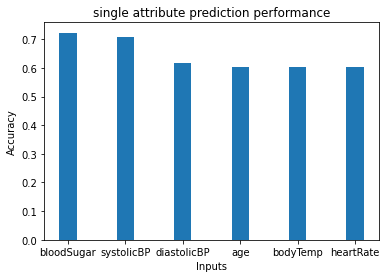

In [108]:
# after collecting 6 single attributes here is the plot 
singledata = [0.7228, 0.7079, 0.6188, 0.6040,  0.6040, 0.6040]
labels = ['bloodSugar', 'systolicBP', 'diastolicBP', 'age', 'bodyTemp', 'heartRate']
plt.xticks([0,1,2,3,4,5], labels)
plt.xlabel('Inputs')
plt.ylabel('Accuracy')
plt.title('single attribute prediction performance')
plt.bar([0,1,2,3,4,5], singledata, width = 0.3) 
plt.show()

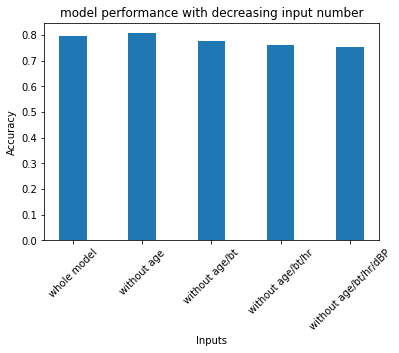

In [172]:
# after collecting taking each single attribute out, here is the plot 
take_out_data = [0.7970, 0.8069, 0.7772, 0.7624,  0.7525]
labels = ['whole model','without age', 'without age/bt', 'without age/bt/hr', 'without age/bt/hr/dBP']
plt.xticks([0,1,2,3,4], labels, rotation = 45)

plt.xlabel('Inputs')
plt.ylabel('Accuracy')
plt.title('model performance with decreasing input number')
plt.bar([0,1,2,3,4], take_out_data, width = 0.4) 
plt.show()

In [1]:
%%shell
jupyter nbconvert --to html /content/phrase4Report.ipynb

[NbConvertApp] WARNING | pattern '/content/phrase4Report.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--

CalledProcessError: ignored